In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples for each vehicle type
n_samples = 100

# Generate features for bikes
bikes = pd.DataFrame({
    'no_of_wheels': np.random.randint(2, 3, n_samples),
    'weight': np.random.normal(loc=200, scale=50, size=n_samples),
    'engine_cc': np.random.normal(loc=150, scale=50, size=n_samples),
    'vehicle_type': 'bike'
})

# Generate features for cars
cars = pd.DataFrame({
    'no_of_wheels': np.random.randint(4, 5, n_samples),
    'weight': np.random.normal(loc=1500, scale=200, size=n_samples),
    'engine_cc': np.random.normal(loc=2000, scale=300, size=n_samples),
    'vehicle_type': 'car'
})

# Generate features for trucks
trucks = pd.DataFrame({
    'no_of_wheels': np.random.randint(6, 18, n_samples),
    'weight': np.random.normal(loc=5000, scale=1000, size=n_samples),
    'engine_cc': np.random.normal(loc=8000, scale=1000, size=n_samples),
    'vehicle_type': 'truck'
})

# Combine the data into a single DataFrame
df = pd.concat([bikes, cars, trucks], ignore_index=True)

# Display the first few rows of the dataset
print(df.head())

   no_of_wheels      weight   engine_cc vehicle_type
0             2  224.835708   79.231463         bike
1             2  193.086785  128.967734         bike
2             2  232.384427  132.864274         bike
3             2  276.151493  109.886137         bike
4             2  188.292331  141.935714         bike


In [ ]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
for vehicle_type, color in zip(['bike', 'car', 'truck'], ['blue', 'green', 'red']):
    subset = df[df['vehicle_type'] == vehicle_type]
    plt.scatter(subset['weight'], subset['engine_cc'], c=color, label=vehicle_type)
plt.xlabel('Weight')
plt.ylabel('Engine CC')
plt.legend()
plt.title('Vehicle Data Visualization')
plt.grid(True)
plt.show()

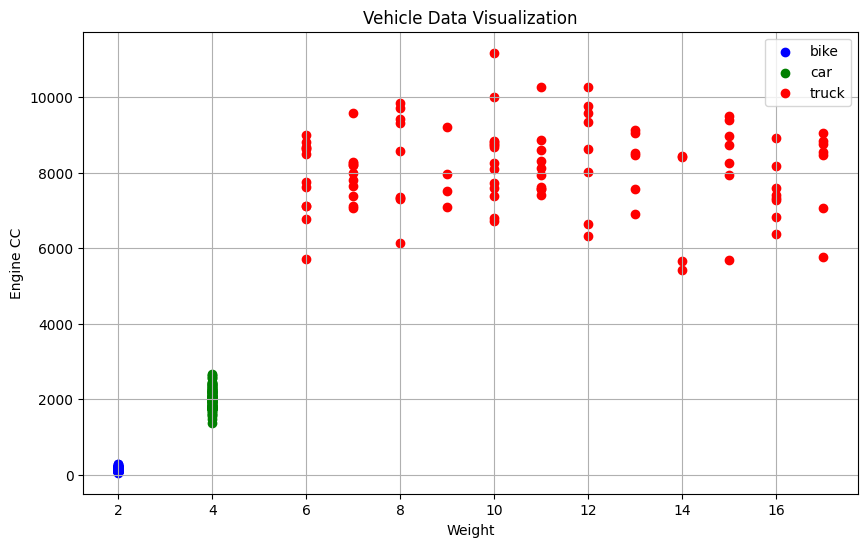

In [3]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
for vehicle_type, color in zip(['bike', 'car', 'truck'], ['blue', 'green', 'red']):
    subset = df[df['vehicle_type'] == vehicle_type]
    plt.scatter(subset['no_of_wheels'], subset['engine_cc'], c=color, label=vehicle_type)
plt.xlabel('Weight')
plt.ylabel('Engine CC')
plt.legend()
plt.title('Vehicle Data Visualization')
plt.grid(True)
plt.show()

In [ ]:
# Prepare the data for KNN classification
X = df[['no_of_wheels', 'weight', 'engine_cc']]
y = df['vehicle_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

   load_capacity      weight   engine_cc vehicle_type
0     109.934283  129.231463  167.889368         bike
1      97.234714  178.967734  178.039226         bike
2     112.953771  182.864274  204.152562         bike
3     130.460597  159.886137  202.690103         bike
4      95.316933  191.935714   81.116532         bike


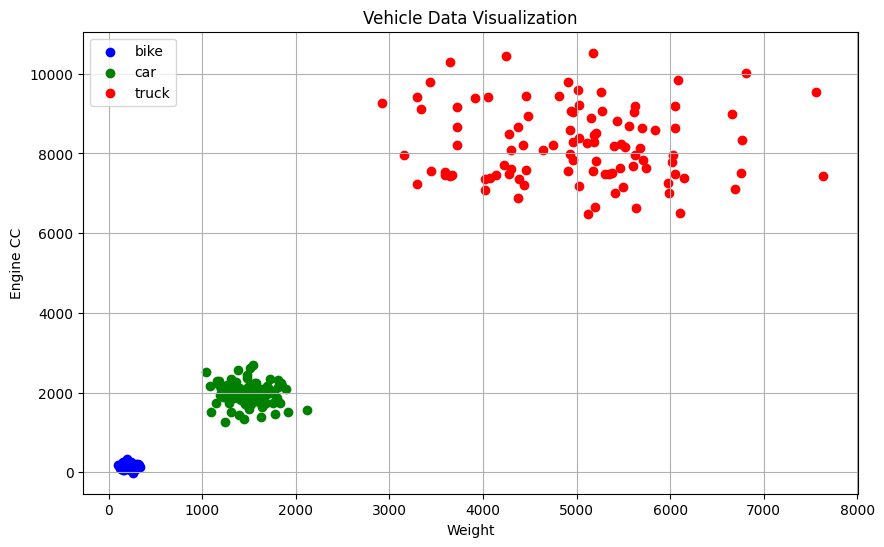

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples for each vehicle type
n_samples = 100

# Generate features for bikes
bikes = pd.DataFrame({
    'load_capacity': np.random.normal(loc=100, scale=20, size=n_samples),  # in kg
    'weight': np.random.normal(loc=200, scale=50, size=n_samples),  # in kg
    'engine_cc': np.random.normal(loc=150, scale=50, size=n_samples),  # in cc
    'vehicle_type': 'bike'
})

# Generate features for cars
cars = pd.DataFrame({
    'load_capacity': np.random.normal(loc=500, scale=100, size=n_samples),  # in kg
    'weight': np.random.normal(loc=1500, scale=200, size=n_samples),  # in kg
    'engine_cc': np.random.normal(loc=2000, scale=300, size=n_samples),  # in cc
    'vehicle_type': 'car'
})

# Generate features for trucks
trucks = pd.DataFrame({
    'load_capacity': np.random.normal(loc=2000, scale=500, size=n_samples),  # in kg
    'weight': np.random.normal(loc=5000, scale=1000, size=n_samples),  # in kg
    'engine_cc': np.random.normal(loc=8000, scale=1000, size=n_samples),  # in cc
    'vehicle_type': 'truck'
})

# Combine the data into a single DataFrame
df = pd.concat([bikes, cars, trucks], ignore_index=True)

# Display the first few rows of the dataset
print(df.head())

# Visualize the dataset
plt.figure(figsize=(10, 6))
for vehicle_type, color in zip(['bike', 'car', 'truck'], ['blue', 'green', 'red']):
    subset = df[df['vehicle_type'] == vehicle_type]
    plt.scatter(subset['weight'], subset['engine_cc'], c=color, label=vehicle_type)
plt.xlabel('Weight')
plt.ylabel('Engine CC')
plt.legend()
plt.title('Vehicle Data Visualization')
plt.grid(True)
plt.show()

In [2]:
bikes

,load_capacity,weight,engine_cc,vehicle_type
0,109.934283,129.231463,167.889368,bike
1,97.234714,178.967734,178.039226,bike
2,112.953771,182.864274,204.152562,bike
3,130.460597,159.886137,202.690103,bike
4,95.316933,191.935714,81.116532,bike
...,...,...,...,...
95,70.729701,219.265869,115.354520,bike
96,105.922406,155.807128,194.979994,bike
97,105.221105,207.686255,165.364976,bike
98,100.102269,202.910436,190.643106,bike


In [ ]:
# Prepare the data for KNN classification
X = df[['load_capacity', 'weight', 'engine_cc']]
y = df['vehicle_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples for each class
n_samples = 100

# Generate features for Class 1 (non-normal distribution)
class1 = pd.DataFrame({
    'feature1': np.random.exponential(scale=2, size=n_samples),
    'feature2': np.random.uniform(low=0, high=10, size=n_samples),
    'class': 'class1'
})

# Generate features for Class 2 (non-normal distribution)
class2 = pd.DataFrame({
    'feature1': np.random.exponential(scale=5, size=n_samples),
    'feature2': np.random.uniform(low=10, high=20, size=n_samples),
    'class': 'class2'
})

# Combine the data into a single DataFrame
df = pd.concat([class1, class2], ignore_index=True)

# Display the first few rows of the dataset
print(df.head())

# Visualize the dataset
plt.figure(figsize=(10, 6))
for class_label, color in zip(['class1', 'class2'], ['blue', 'green']):
    subset = df[df['class'] == class_label]
    plt.scatter(subset['feature1'], subset['feature2'], c=color, label=class_label)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Non-Normal Distribution Data Visualization')
plt.grid(True)
plt.show()

# Prepare the data for KNN classification
X = df[['feature1', 'feature2']]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a K
